In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate

### **Identify and Explain Issue**

In [27]:
def identify_explain_indirect(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 and Speaker 2 have an exchange. Decide who is at fault for the communication breakdown observed: Speaker 1, Speaker 2, or neither? You can only choose one option. Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain_indirect(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [6]:
with open('../indirect_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [7]:
with open('../indirect_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'neither',
  'explanation': 'There is no definitive communication breakdown in this dialogue. Speaker 1 asked a question seeking guidance on how to approach the next meeting, and Speaker 2 confirmed their ability to provide that information. From a neurodiversity-informed perspective, recognizing communication differences is crucial. Speaker 2’s response might reflect a different communication style rather than an outright failure to provide the required details right away. Further questions or prompting would likely facilitate the delivery of the expected information.'},
 {'fault': 'Speaker 2',
  'explanation': "In this dialogue, Speaker 1 asks an open-ended question, expecting details about what they should do. Speaker 2 provides a confirmation that they have thought about the next steps but doesn't share any specifics. This leaves Speaker 1's question unanswered. Given the context where one speaker is autistic, it's important to understand that direct, detailed communicat

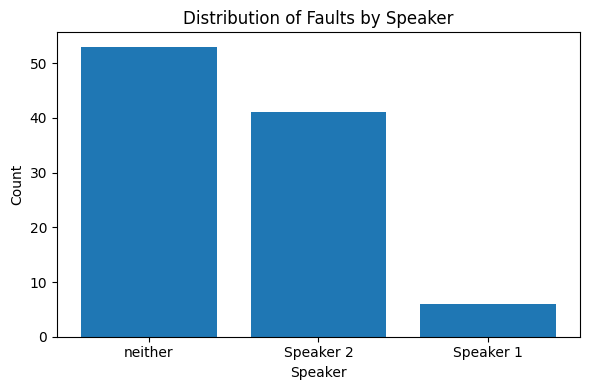

In [8]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [11]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 and Speaker 2 have an exchange. As a communication expert, what feedback would you provide to the speaker(s)? Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [13]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [17]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [18]:
with open('../indirect_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [19]:
with open('../indirect_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Great start on the conversation! Speaker 2's response might come across as a bit abrupt to some people. It could help to add more detail or reassurance to the response, such as outlining that they will help with planning or discussing specific strategies. Remember, clear and detailed communication can benefit everyone, as it helps ensure that everyone understands and feels included in the conversation."},
 {'feedback': "It's great to see that both speakers are engaging in the discussion and planning for next steps. Speaker 2's response indicates they have considered the question, but it might be helpful to provide more details or clarifications about their thoughts to facilitate better understanding and collaboration. For example, they could share specific ideas or a plan outline to ensure clear communication with Speaker 1."},
 {'feedback': "It's essential to appreciate and accommodate different communication styles. Speaker 1’s open-ended question is clear and inviting

### **Identify Autistic Speaker**


In [20]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? You can only choose one option. Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [21]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [22]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [24]:
with open('../indirect_analysis_data/autistic_speaker_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [25]:
with open('../indirect_analysis_data/autistic_speaker_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'Speaker 2',
  'explanation': "Autistic individuals may sometimes interpret language literally and respond in a very direct manner. In this dialogue, Speaker 2 provides a literal and direct response to Speaker 1's question, focusing only on confirming their ability to give the information rather than providing the needed approach or asking for more details. This response suggests a communication style that can be characteristic of some autistic individuals, who may prioritize accuracy and directness in conversations."},
 {'autistic': 'Speaker 2',
  'explanation': "Speaker 2's response is direct and to the point, which can be a communication style associated with autistic individuals. They offer a clear and concise answer without additional context or elaboration, reflecting a tendency for straightforward communication. However, it is crucial to highlight that autism manifests differently in each individual, and interpreting conversational nuances alone has limitations. Th

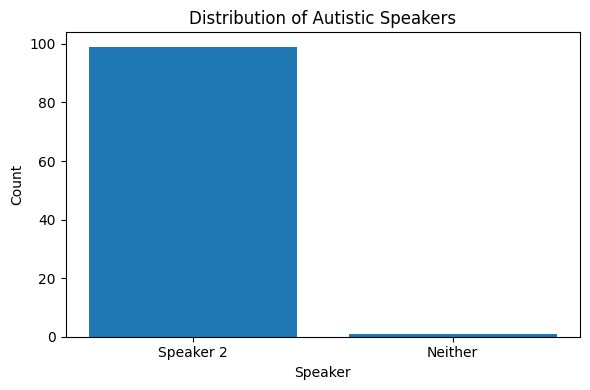

In [26]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
